In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import tensorflow as tf

In [4]:
from tensorflow import keras

In [7]:
fashion=keras.datasets.fashion_mnist


In [8]:
(train_img,train_labels),(test_img,test_labels)=fashion.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [11]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [12]:
type(train_img)

numpy.ndarray

In [14]:
train_img.shape

(60000, 28, 28)

In [15]:
labels={0:"T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}
labels

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

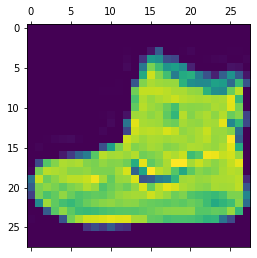

In [16]:
plt.matshow(train_img[0])

In [17]:
train_img[0].shape

(28, 28)

In [19]:
labels[train_labels[0]]

'Ankle boot'

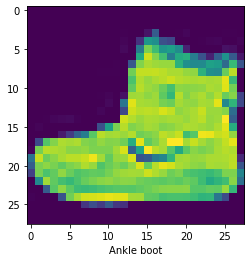

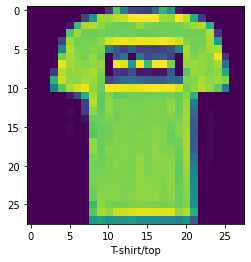

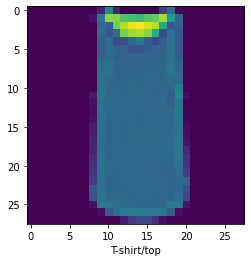

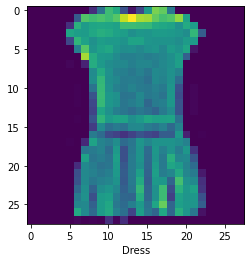

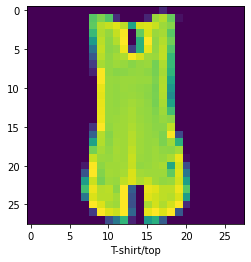

In [20]:
for i in range(5):
    plt.imshow(train_img[i])
    plt.xlabel(labels[train_labels[i]])
    plt.show()

In [21]:
train_img=train_img/255
test_img=test_img/255

In [23]:
train_img_flat=train_img.reshape(len(train_img),28*28)
test_img_flat=test_img.reshape(len(test_img),28*28)

In [24]:
train_img_flat[0].shape

(784,)

In [25]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])
model.compile(optimizer="adam",
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(train_img_flat,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5956 - accuracy: 0.7987
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4616 - accuracy: 0.8421
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4349 - accuracy: 0.8512
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4223 - accuracy: 0.8539
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4136 - accuracy: 0.8572


In [36]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation="relu"),
    keras.layers.Dense(50,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])
model.compile(optimizer="adam",
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(train_img_flat,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5094 - accuracy: 0.8198
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3759 - accuracy: 0.8632
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3384 - accuracy: 0.8748
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3151 - accuracy: 0.8843
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2990 - accuracy: 0.8902


In [37]:
model.evaluate(test_img_flat,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3558 - accuracy: 0.8757


[0.355755090713501, 0.8756999969482422]

In [38]:
predicted=model.predict(test_img_flat)
pre_labels=[np.argmax(i) for i in predicted]
pre_labels[:10]

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7]

In [39]:
import seaborn as sns

In [40]:
cm=tf.math.confusion_matrix(labels=test_labels,predictions=pre_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[789,   2,  19,  39,   5,   0, 141,   0,   5,   0],
       [  1, 965,   2,  21,   6,   0,   4,   0,   0,   1],
       [ 10,   1, 774,  14, 130,   0,  71,   0,   0,   0],
       [ 17,  11,  17, 915,  24,   0,  15,   0,   1,   0],
       [  0,   0,  85,  48, 813,   0,  54,   0,   0,   0],
       [  0,   0,   0,   0,   0, 926,   0,  53,   1,  20],
       [ 93,   1,  78,  31,  94,   0, 698,   0,   5,   0],
       [  0,   0,   0,   0,   0,   5,   0, 977,   0,  18],
       [  4,   0,   2,  10,  13,   1,  18,   3, 949,   0],
       [  0,   0,   0,   0,   0,   5,   1,  43,   0, 951]])>

Text(69.0, 0.5, 'truth')

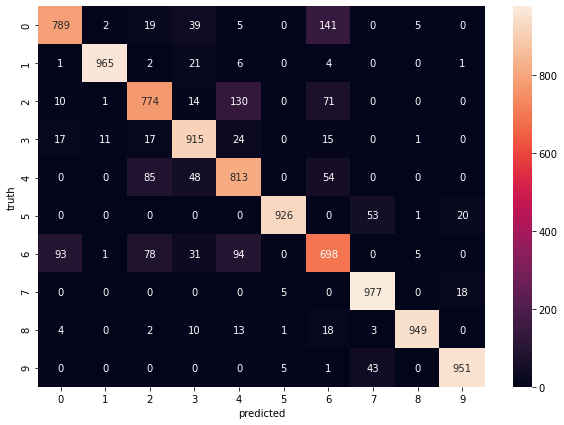

In [41]:
cm=tf.math.confusion_matrix(labels=test_labels,predictions=pre_labels)
cm
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("predicted")
plt.ylabel("truth")